mask RCNN 

zdroj:https://github.com/matterport/Mask_RCNN

In [ ]:
pip install -r '/content/drive/My Drive/MVI/maskRcnn/requirements.txt'

     |████████████████████████████████| 317kB 5.3MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 163kB 7.9MB/s 
     |████████████████████████████████| 204kB 9.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
 pip install tensorflow==1.7.0

Vytvoření modelu.

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/My Drive/MVI/maskRcnn/")
 
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
sys.path.append("/content/drive/My Drive/MVI/maskRcnn/samples/flags/")
import custom
 
%matplotlib inline 
 
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
 
# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
#BALLON_WEIGHTS_PATH = "/content/drive/My Drive/MVI/maskRcnn/w4.h5"  # TODO: update this path
 
config = custom.CustomConfig()
CUSTOM_DIR = os.path.join(ROOT_DIR, "dataset")
 
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
config = InferenceConfig()
config.display()
 
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0
 
# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"
 
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
     
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
 
# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(CUSTOM_DIR, "val")
 
# Must call before using the dataset
dataset.prepare()
 
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))
 
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
 
weights_path ="/content/drive/My Drive/MVI/maskRcnn/WW5.h5" # model.find_last()
 
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
import glob
from PIL import Image
import os


Nahrání obrázku k hledání masky.

In [ ]:
data_dir_images = '/content/drive/My Drive/MVI/videoTest/images/croppedImages/'
images_cropped_path = []
cnt = 0
for inp_file in os.listdir(data_dir_images):
  #print(inp_file)
  if(inp_file[0:3] == 'img'):
    cnt = cnt + 1
    #image_paths += [input_path + inp_file]
    #print(inp_file)
print(cnt)
for i in range(1,cnt+1):
  #image_paths += [input_path + "img" + str(i) + ".jpg"]
  path = data_dir_images + "img" + str(i) + ".jpg"
  print(path)
  images_cropped_path.append((path))

28
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img1.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img2.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img3.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img4.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img5.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img6.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img7.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img8.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img9.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img10.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img11.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img12.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img13.jpg
/content/drive/My Drive/MVI/videoTest/images/croppedImages/img14.jpg
/content/drive/My Drive/MVI/videoTest/im

In [ ]:
import matplotlib.image as mpimg


Hledání masek.

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img1.jpg
Processing 1 images
image                    shape: (78, 157, 3)          min:    0.00000  max:  100.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -4.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


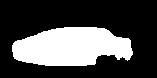

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img2.jpg
Processing 1 images
image                    shape: (119, 218, 3)         min:    0.00000  max:  114.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -10.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/content/drive/My Drive/MVI/videoTest/images/croppedImages/img3.jpg
Processing 1 images
image                    shape: (78, 157, 3)          min:    0.00000  max:  100.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -4.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/content/drive/My Drive/MVI/videoTest/images/croppedImages/img4.jpg
Processing 1 images
image                    shape: (119, 217, 3)         min:    0.00000  max:  114.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -10.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/content/drive/My Drive/MVI/videoTest/images/croppedImages/img5.jpg
Processing 1 images
image                    shape: (78, 157, 3)          min:    0.00000  max:  100.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -4.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


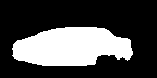

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img6.jpg
Processing 1 images
image                    shape: (119, 217, 3)         min:    0.00000  max:  114.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -10.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


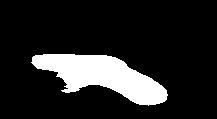

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img7.jpg
Processing 1 images
image                    shape: (78, 157, 3)          min:    0.00000  max:  100.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -4.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


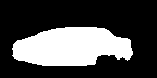

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img8.jpg
Processing 1 images
image                    shape: (120, 217, 3)         min:    0.00000  max:  114.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -10.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


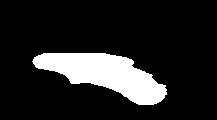

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img9.jpg
Processing 1 images
image                    shape: (78, 151, 3)          min:    0.00000  max:  101.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -3.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


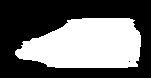

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img10.jpg
Processing 1 images
image                    shape: (127, 219, 3)         min:    0.00000  max:  116.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -8.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


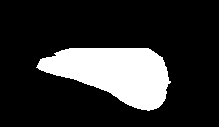

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img11.jpg
Processing 1 images
image                    shape: (77, 155, 3)          min:    0.00000  max:  102.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -2.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


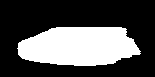

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img12.jpg
Processing 1 images
image                    shape: (109, 197, 3)         min:    0.00000  max:  114.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -10.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


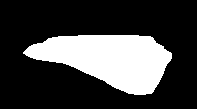

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img13.jpg
Processing 1 images
image                    shape: (85, 151, 3)          min:    0.00000  max:  102.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -2.90000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/content/drive/My Drive/MVI/videoTest/images/croppedImages/img14.jpg
Processing 1 images
image                    shape: (107, 198, 3)         min:    0.00000  max:  113.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -11.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/content/drive/My Drive/MVI/videoTest/images/croppedImages/img15.jpg
Processing 1 images
image                    shape: (100, 209, 3)         min:    0.00000  max:  115.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -9.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


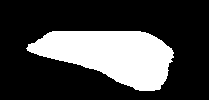

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img16.jpg
Processing 1 images
image                    shape: (97, 223, 3)          min:    0.00000  max:  120.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -4.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


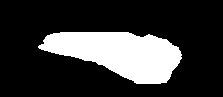

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img17.jpg
Processing 1 images
image                    shape: (98, 231, 3)          min:    0.00000  max:  117.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -7.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


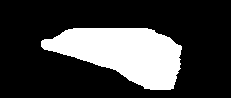

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img18.jpg
Processing 1 images
image                    shape: (98, 233, 3)          min:    0.00000  max:  119.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -5.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


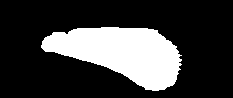

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img19.jpg
Processing 1 images
image                    shape: (98, 233, 3)          min:    0.00000  max:  119.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -5.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


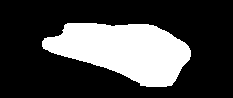

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img20.jpg
Processing 1 images
image                    shape: (98, 234, 3)          min:    0.00000  max:  119.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -5.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


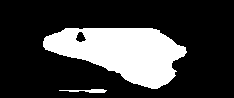

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img21.jpg
Processing 1 images
image                    shape: (100, 235, 3)         min:    0.00000  max:  119.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -5.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


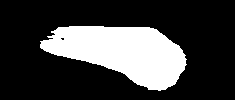

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img22.jpg
Processing 1 images
image                    shape: (99, 222, 3)          min:    0.00000  max:  116.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -8.70000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


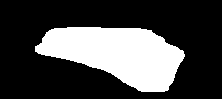

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img23.jpg
Processing 1 images
image                    shape: (67, 61, 3)           min:    8.00000  max:  194.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   69.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
nula


(67, 61)

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img24.jpg
Processing 1 images
image                    shape: (73, 124, 3)          min:   11.00000  max:  211.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   86.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
nula


(73, 124)

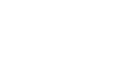

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img25.jpg
Processing 1 images
image                    shape: (65, 112, 3)          min:    6.00000  max:  230.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  105.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
nula


(65, 112)

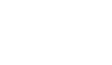

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img26.jpg
Processing 1 images
image                    shape: (59, 140, 3)          min:    8.00000  max:  167.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   42.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
nula


(59, 140)

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img27.jpg
Processing 1 images
image                    shape: (57, 136, 3)          min:   15.00000  max:  216.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  105.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


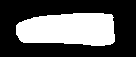

/content/drive/My Drive/MVI/videoTest/images/croppedImages/img28.jpg
Processing 1 images
image                    shape: (79, 178, 3)          min:   33.00000  max:  179.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   54.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
nula


(79, 178)

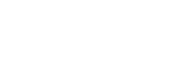

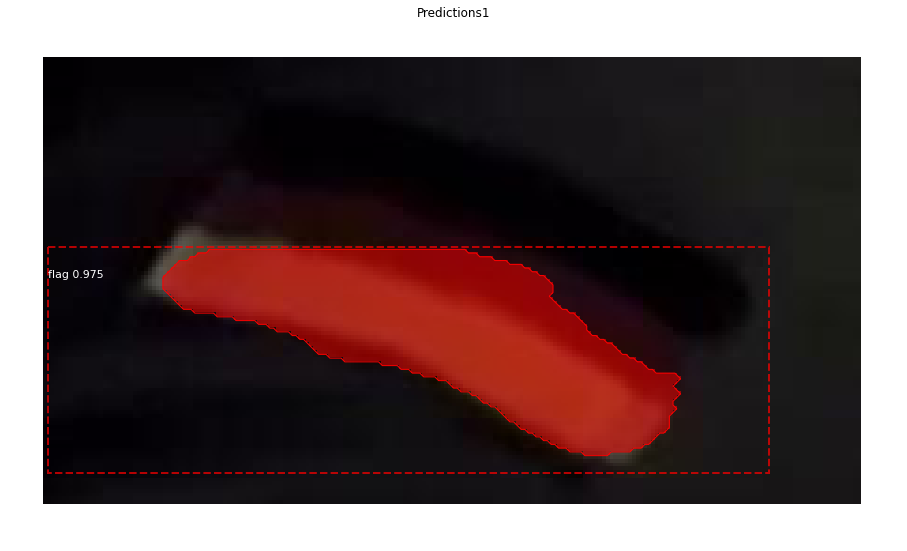

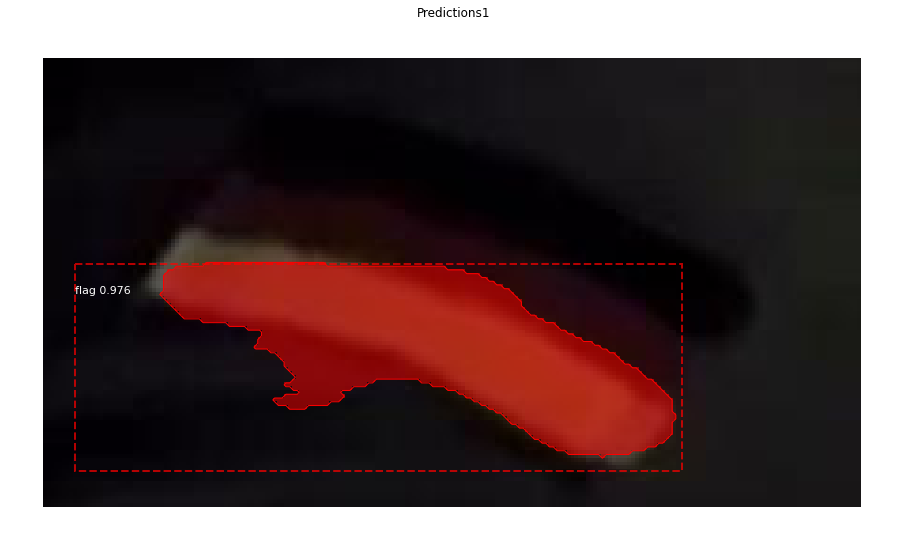

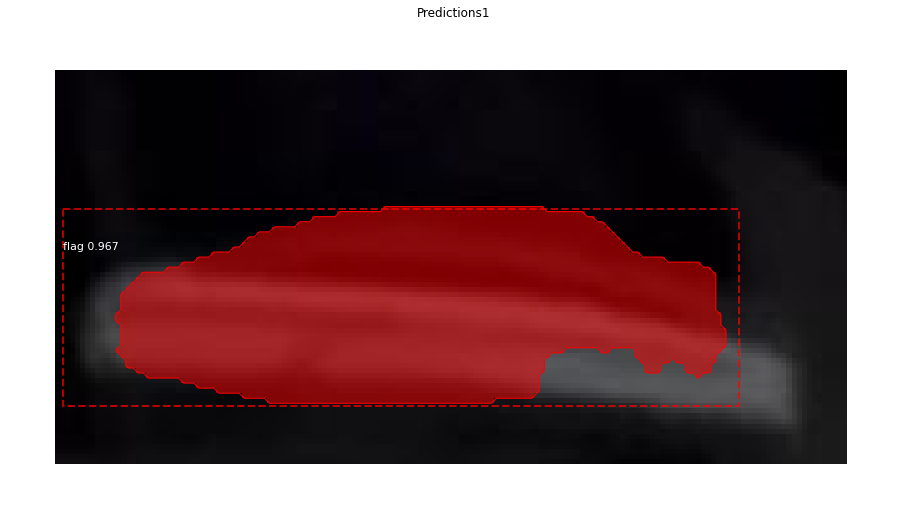

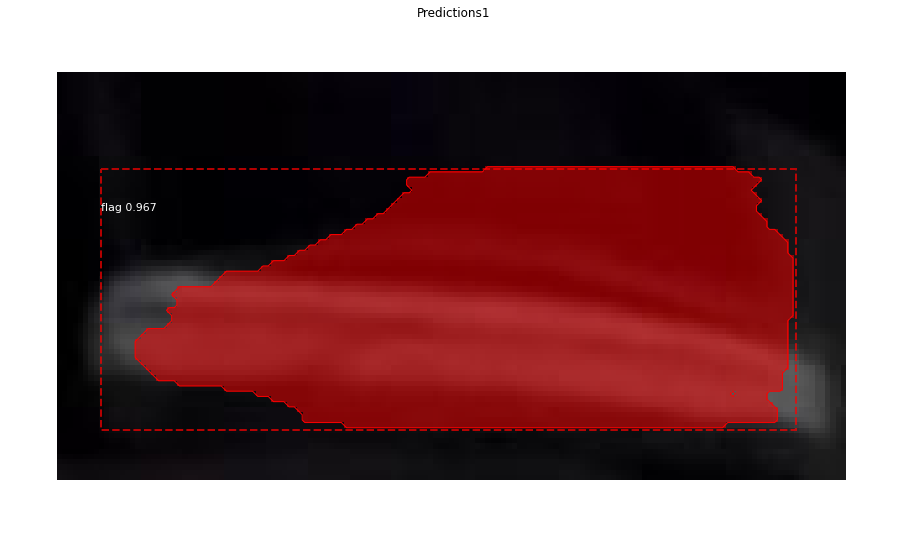

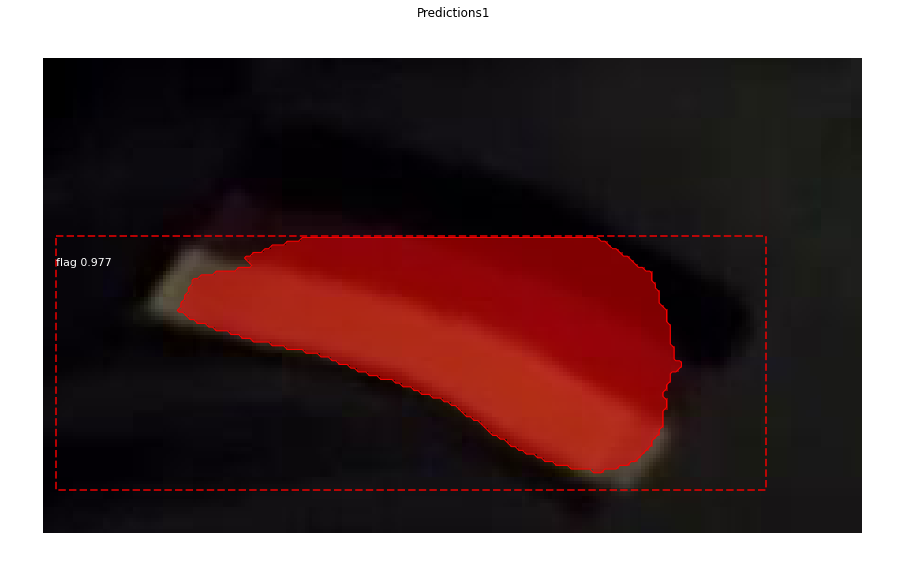

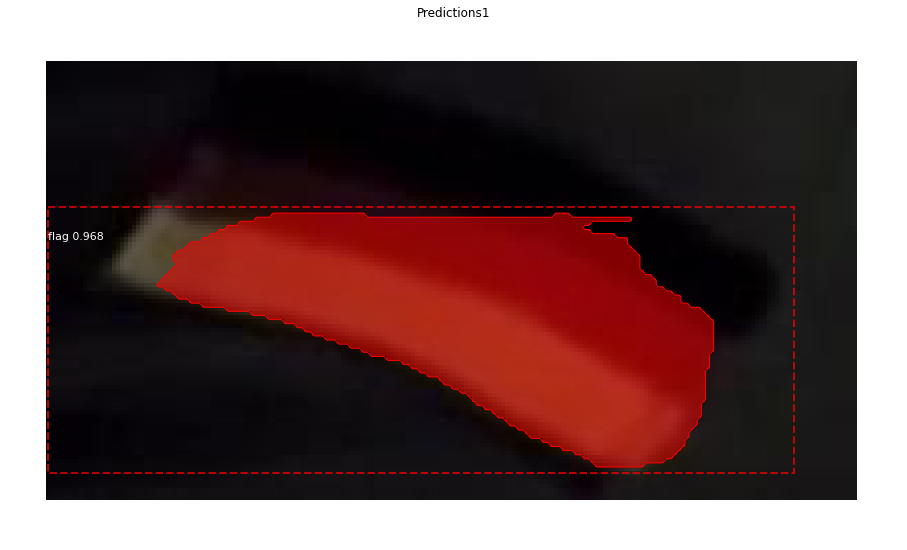

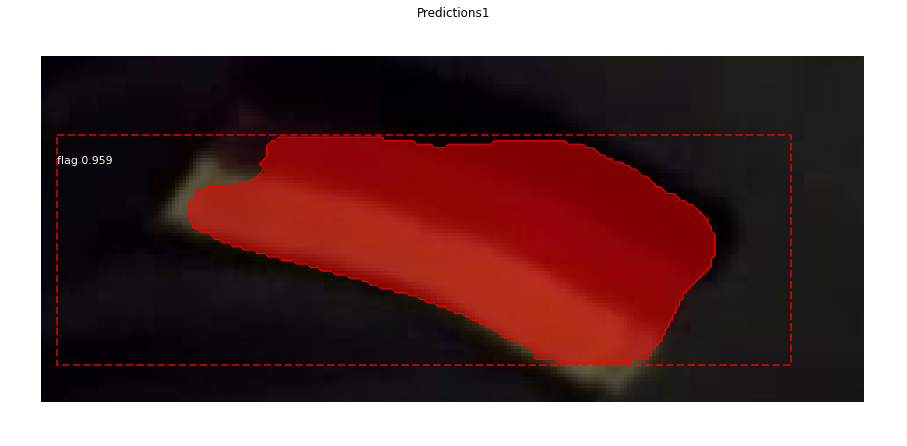

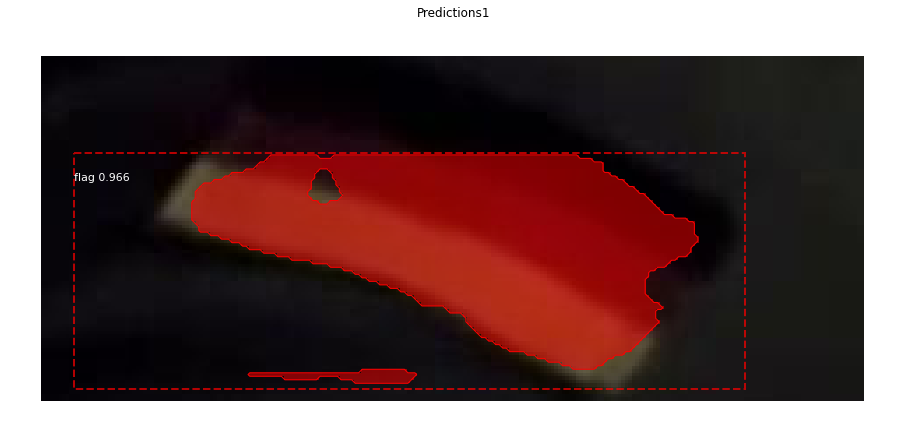

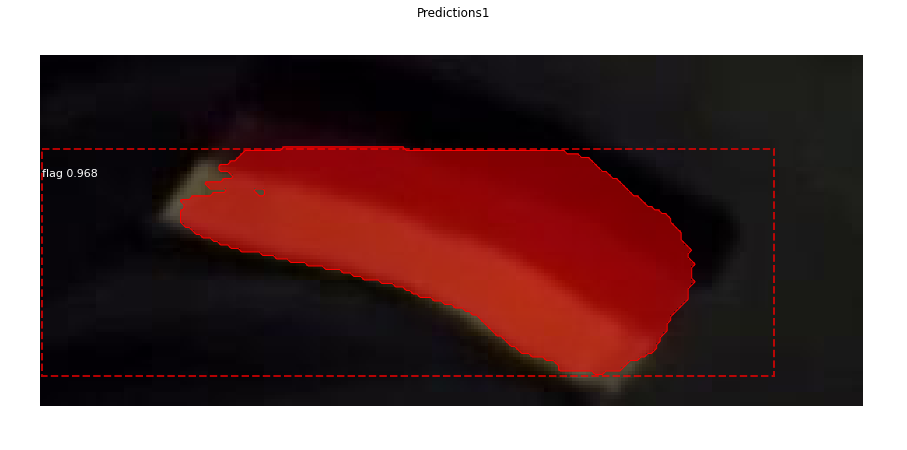

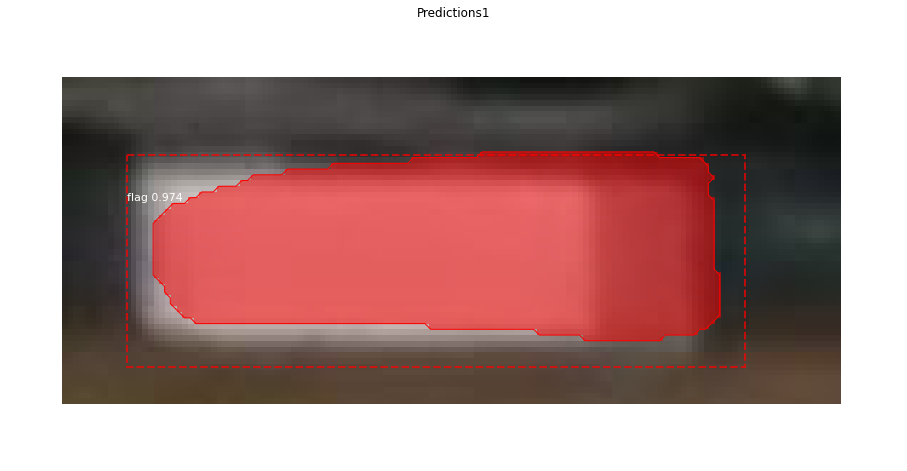

In [ ]:
images_cropped_masks = []
cnt = 1
for img_path in images_cropped_path:
  img = mpimg.imread(img_path)
  print(img_path)
  result = model.detect([img], verbose=1)
  result = result[0]


  if len(result['scores']) == 0:
    print('nula')
    mask = np.full_like(img,True, dtype=bool)
    mask = mask[:,:,0:1]
    mask = np.squeeze(mask)
    display(mask.shape)
  elif len(result['scores']) > 1:
    index_of_max_score = -1
    max_score = -1
    for i in range(0,len(result['scores'])):
      if result['scores'][i] > max_score:
        index_of_max_score = i
        max_score = result['scores'][i]
    print(index_of_max_score)
    ax = get_ax(1)
    visualize.display_instances(img, result['rois'][index_of_max_score:index_of_max_score+1,:], result['masks'][:,:,index_of_max_score:index_of_max_score+1], result['class_ids'][index_of_max_score:index_of_max_score+1],
                                dataset.class_names, result['scores'][index_of_max_score:index_of_max_score+1], ax=ax,
                                title="Predictions1")
    mask = np.squeeze(result['masks'][:,:,index_of_max_score:index_of_max_score+1])
  else:
    ax = get_ax(1)
    visualize.display_instances(img, result['rois'], result['masks'], result['class_ids'],
                              dataset.class_names, result['scores'], ax=ax,
                              title="Predictions1")
    mask = np.squeeze(result['masks'])



  mask = Image.fromarray(mask)

  mask.save("/content/drive/My Drive/MVI/videoTest/images/croppedImagesMasks/mask"+str(cnt)+ ".jpg")
  cnt = cnt + 1
  display(mask)

  images_cropped_masks.append(mask)


